<a target="_blank" href="https://colab.research.google.com/github/KrishnaRekapalli/docling-rag-tutorial-pydata-2025/blob/main/notebooks/1.%20docling%20101.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Simple usage

In [ ]:
% pip install docling 

In [1]:
from docling.document_converter import DocumentConverter

In [16]:
source = "https://arxiv.org/pdf/2408.09869v4"  # document per local path or URL
converter = DocumentConverter()
result = converter.convert(source)
print(result.document.export_to_markdown())
# output: ## Docling Technical Report [...]"

INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash 70041f74270850b7bedf7c8f5c2dcede
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.pipeline.base_pipeline:Processing document 2408.09869v4.pdf
INFO:docling.document_converter:Finished converting document 2408.09869v4.pdf in 24.29 sec.


## Docling Technical Report

Nikolaos Livathinos * , Christoph Auer * , Maksym Lysak, Ahmed Nassar, Michele Dolfi, Panagiotis Vagenas, Cesar Berrospi, Matteo Omenetti, Kasper Dinkla, Yusik Kim, Shubham Gupta, Rafael Teixeira de Lima, Valery Weber, Lucas Morin, Ingmar Meijer, Viktor Kuropiatnyk, Peter W. J. Staar

IBM Research, R¨ uschlikon, Switzerland

Please send correspondence to: deepsearch-core@zurich.ibm.com

## Abstract

We introduce Docling , an easy-to-use, self-contained, MITlicensed, open-source toolkit for document conversion, that can parse several types of popular document formats into a unified, richly structured representation. It is powered by state-of-the-art specialized AI models for layout analysis (DocLayNet) and table structure recognition (TableFormer), and runs efficiently on commodity hardware in a small resource budget. Docling is released as a Python package and can be used as a Python API or as a CLI tool. Docling's modular architecture and efficient documen

# Advanced usage

In [17]:
import json
import logging
import time
from pathlib import Path

In [18]:
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [19]:
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)


In [ ]:

input_doc_path = "https://arxiv.org/pdf/2408.09869v4"

# DocParsing with metadata captured from vision models
# ----------------------
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = False
pipeline_options.do_table_structure = True
pipeline_options.do_picture_classification= False
pipeline_options.do_formula_enrichment=False
pipeline_options.do_picture_description=True
pipeline_options.generate_picture_images = True
pipeline_options.table_structure_options.do_cell_matching = True
pipeline_options.picture_description_options.prompt = (
    "Describe the image in three sentences. Be consise and accurate."
)

pipeline_options.accelerator_options = AcceleratorOptions(
    num_threads=4, device=AcceleratorDevice.AUTO
)

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

start_time = time.time()
conv_result = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time

_log.info(f"Document converted in {end_time:.2f} seconds.")


INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash a2abfd3382e65e2b0905df85efb7bc7b
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.utils.accelerator_utils:Accelerator device: 'mps'
INFO:docling.pipeline.base_pipeline:Processing document 2408.09869v4.pdf
INFO:docling.document_converter:Finished converting document 2408.09869v4.pdf in 191.53 sec.
INFO:__main__:Document converted in 191.58 seconds.



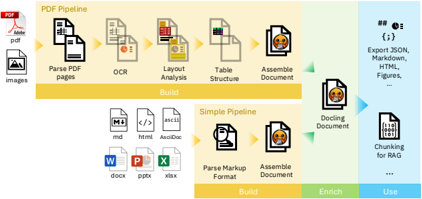
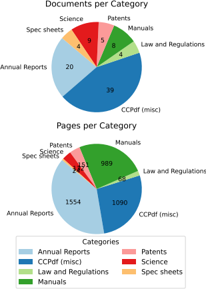
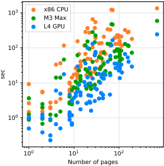
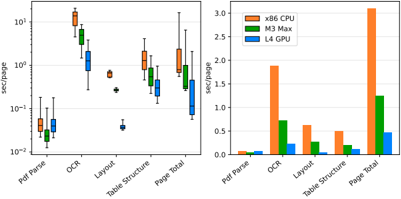
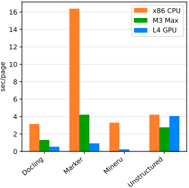

In [33]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in conv_result.document.pictures[:5]:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{pic.image.uri!s}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=conv_result.document)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))